In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# We will use astropy's WCS and ZScaleInterval for plotting
from astropy.wcs import WCS
from astropy.visualization import ZScaleInterval

# We will use several stack functions
import lsst.geom
import lsst.afw.display as afwDisplay
import lsst.afw.display.rgb as rgb

# And also DESC packages to get the data path
import GCRCatalogs
from GCRCatalogs import GCRQuery
import desc_dc2_dm_data

import seaborn as sns

In [2]:
GCRCatalogs.get_available_catalogs(names_only=True)

['buzzard',
 'buzzard_high-res',
 'cosmoDC2_v1.1.4_image',
 'cosmoDC2_v1.1.4_redmapper_v0.8.1',
 'cosmoDC2_v1.1.4_small',
 'dc2_object_run1.2i',
 'dc2_object_run1.2i_all_columns',
 'dc2_object_run1.2i_tract4850',
 'dc2_object_run1.2i_with_photoz',
 'dc2_object_run1.2p',
 'dc2_object_run1.2p_all_columns',
 'dc2_object_run1.2p_tract4850',
 'dc2_object_run2.2i_dr2_wfd',
 'dc2_object_run2.2i_dr2_wfd_with_addons',
 'dc2_object_run2.2i_dr3a',
 'dc2_object_run2.2i_dr3a_with_metacal',
 'dc2_object_run2.2i_dr3a_with_photoz',
 'dc2_object_run2.2i_dr6',
 'dc2_object_run2.2i_dr6_with_addons',
 'dc2_redmapper_run2.2i_dr6_wfd_v0.8.1',
 'dc2_truth_run1.2_static',
 'dc2_truth_run1.2_variable_lightcurve',
 'dc2_truth_run1.2_variable_summary',
 'dc2_truth_run2.2i_galaxy_truth_summary',
 'dc2_truth_run2.2i_sn_truth_summary',
 'dc2_truth_run2.2i_sn_variability_truth',
 'dc2_truth_run2.2i_star_lc_stats',
 'dc2_truth_run2.2i_star_truth_summary',
 'dc2_truth_run2.2i_star_variability_truth',
 'dc2_truth_run2.

In [3]:
# We load the catalog with addons
cat = GCRCatalogs.load_catalog('dc2_object_run2.2i_dr6_with_addons')

In [4]:
# We check what catalogs are part of the catalog with addons
cat.catalogs

(<GCRCatalogs.dc2_object.DC2ObjectParquetCatalog at 0x2aaaafd82910>,
 <GCRCatalogs.dc2_photoz_parquet.DC2PhotozCatalog at 0x2aaaf86dc070>)

In [5]:
# We are going to be interested in several of them:
# 1) The ObjectParqueCatalog (that's the main one with ra, dec, etc.)
# 2) The TruthMatchCatalog (if you want true redshifts)
# 3) The PhotozCatalog (if you want photometric redshifts)
#cat.catalogs[0].list_all_quantities()

In [6]:
cat.catalogs[0].list_all_quantities()

['psFluxErr_r',
 'IxxPSF_pixel_i',
 'Ixx_pixel_y',
 'ra',
 'Ixx_pixel_g',
 'IxyPSF_pixel_r',
 'mag_z_cModel',
 'psFlux_flag_g',
 'cModelFluxErr_g',
 'magerr_u',
 'IyyPSF_pixel_g',
 'extendedness',
 'snr_g_cModel',
 'cModelFlux_r',
 'psf_fwhm_u',
 'Iyy_pixel_y',
 'xy_flag',
 'magerr_z',
 'IyyPSF_pixel',
 'Iyy_pixel_z',
 'objectId',
 'I_flag_g',
 'psf_fwhm_r',
 'good',
 'psFluxErr_y',
 'IxxPSF_pixel_r',
 'Ixx_pixel_z',
 'psFlux_flag_z',
 'Ixx_pixel',
 'cModelFluxErr_r',
 'IxyPSF_pixel_u',
 'psFluxErr_z',
 'IxyPSF_pixel_y',
 'snr_i_cModel',
 'magerr_g',
 'psFlux_flag_u',
 'mag_u_cModel',
 'Ixx_pixel_r',
 'magerr_y',
 'x',
 'IxxPSF_pixel_z',
 'Ixy_pixel_r',
 'cModelFlux_flag_u',
 'Iyy_pixel_i',
 'psNdata',
 'mag_u',
 'psFlux_g',
 'cModelFlux_g',
 'cModelFluxErr_y',
 'magerr_u_cModel',
 'psFlux_y',
 'mag_i',
 'mag_g_cModel',
 'Iyy_pixel_g',
 'I_flag_z',
 'IyyPSF_pixel_y',
 'psFlux_flag_r',
 'magerr_y_cModel',
 'IxyPSF_pixel_g',
 'cModelFlux_y',
 'mag_r_cModel',
 'cModelFlux_z',
 'snr_u_cMod

In [7]:
obj = cat.catalogs[0].get_quantities(['ra','dec'])

In [8]:
objlen = len(obj['ra'])

In [9]:
idx = np.random.choice(np.arange(objlen),size=int(objlen/1000.), replace=False) 

In [10]:
ra  = obj['ra'][idx]
dec = obj['dec'][idx]

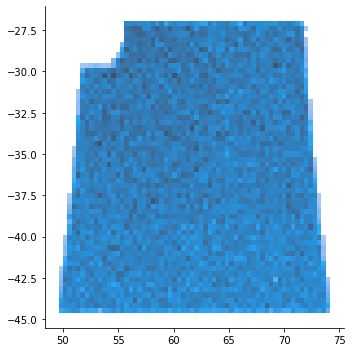

In [11]:
sns.displot(x=ra, y=dec)

In [12]:
cosmo=GCRCatalogs.load_catalog("cosmoDC2_v1.1.4_image")


<Figure size 720x504 with 0 Axes>

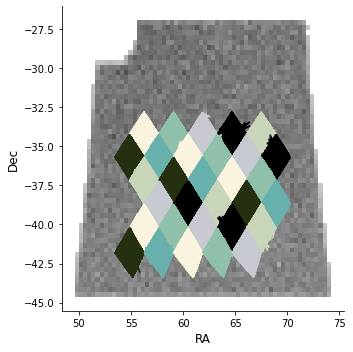

In [24]:
plt.figure(figsize=[10,7])
sns.displot(x=ra, y=dec, color='grey')
plt.xlabel("RA", fontsize=12)
plt.ylabel("Dec", fontsize=12)
i=0
colors = [u'#FAF3DD', u'#8FC0A9', u'#C7C9D1', u'#000000', u'#C8D5B9', u'#243010', u'#68B0AB', u'#2B2D42', u'#574C52', u'#2A3C24']
for healpix in cosmo.available_healpix_pixels:
    if healpix in [9556, 9557, 9558, 9559, 9560, 9683, 9684, 9685, 9686, 9687, 9688, 9812, 9813, 9814, 9815, 9816, 9940, 9941, 9942, 9943, 9944, 10068, 10069, 10070, 10071, 10072, 10195,10196,10197, 10198, 10199]:
        gal = cosmo.get_quantities(['ra','dec'], filters='redshift<.1', native_filters=f"healpix_pixel == {healpix}")
        plt.plot(gal['ra'],gal['dec'], color=colors[i%7])
        # plt.plot(gal['ra'],gal['dec'])
        # plt.text(gal['ra'][0]-1, gal['dec'][0],"{:d}".format(healpix))
        i+=1
plt.tight_layout()
plt.savefig("../plots/healpixels_on_objcat.png", dpi=300)

In [32]:
pwd

'/global/u2/m/mlokken/transient-host-sims/notebooks'

In [ ]:
bright_galaxy_query = GCRQuery(
    "clean",
    "extendedness == 1",
    "mag_r_cModel < 16",
    "snr_g_cModel > 10",
    "snr_r_cModel > 10",
    "snr_i_cModel > 10",
)

In [13]:
columns_to_get0 = ["objectId", "Ixx_pixel", "Iyy_pixel"]
columns_to_get2 = ["match_objectId", "cosmodc2_id_truth"]

In [14]:
max_rshift = 1.0
data0_cols = cat.catalogs[0].get_quantities(columns_to_get0)
data2_cols = cat.catalogs[2].get_quantities(columns_to_get2, filters=['redshift<{:s}'.format(str(max_rshift))])

In [17]:
DF0 = pd.DataFrame(data0_cols)

In [18]:
DF2 = pd.DataFrame(data2_cols)

In [21]:
DF2['objectId'] = DF2['match_objectId']

In [38]:
DF_comb = DF0.join(DF2, on='objectId',rsuffix='_y')

In [39]:
DF_comb.head()

,objectId,Iyy_pixel,Ixx_pixel,match_objectId,cosmodc2_id_truth,objectId_y
0,11975906419540343,8.358371,12.971858,NaN,NaN,NaN
1,11975906419541206,6.564921,6.865114,NaN,NaN,NaN
2,11976043858493441,5.014928,2.295742,NaN,NaN,NaN
3,11976043858493443,7.680129,13.866013,NaN,NaN,NaN
4,11976043858493737,8.637352,2.735219,NaN,NaN,NaN


In [49]:
DF0_objID = DF0['objectId']

In [51]:
DF2_objID = DF2['objectId']

In [57]:
DF2 = DF2[['objectId', 'cosmodc2_id_truth']]

In [61]:
DF_merged = pd.merge(DF0, DF2, on=["objectId"])

In [62]:
DF_merged.head()

,objectId,Iyy_pixel,Ixx_pixel,cosmodc2_id_truth
0,11975906419541206,6.564921,6.865114,10937870093
1,11976043858493441,5.014928,2.295742,11563663598
2,11976043858493443,7.680129,13.866013,10938869183
3,11976043858493737,8.637352,2.735219,11564005688
4,11976043858493738,NaN,NaN,11563831110


In [63]:
DF_merged['cosmoDC2_ID'] = DF_merged['cosmodc2_id_truth']

In [65]:
del DF_merged['cosmodc2_id_truth']

In [68]:
DF_merged_cut = DF_merged[DF_merged['cosmoDC2_ID'] > 0]

In [69]:
DF_merged_cut.to_csv("cosmoDC2_ImageMomentsMatch.tar.gz",index=False)